
# SVM Decision Boundaries — Kernels and Hyperparameters

This notebook generates a synthetic 2D dataset and visualizes **SVM** decision boundaries for multiple configurations:
1) Linear kernel
2) RBF kernel
3) Poly kernel
4) RBF gamma sweep
5) RBF C sweep
6) Polynomial degree sweep

Each configuration is trained in a pipeline with standardization and plotted separately with:
- Decision regions (filled)
- Boundary contours (levels -1, 0, +1)
- Training and test points
- Support vectors (highlighted circles)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt, warnings

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.random.seed(7)
warnings.filterwarnings("ignore")

X, y = make_moons(n_samples=200, noise=0.5, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7, stratify=y
)

def plot_boundary(clf, X_tr, y_tr, X_te, y_te, title):
    x_min, x_max = X[:,0].min()-0.8, X[:,0].max()+0.8
    y_min, y_max = X[:,1].min()-0.8, X[:,1].max()+0.8
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    XY = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.decision_function(XY).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z>0, alpha=0.15)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--","-","--"])
    plt.scatter(X_tr[:,0], X_tr[:,1], s=12, alpha=0.7, label="train")
    plt.scatter(X_te[:,0], X_te[:,1], s=16, alpha=0.9, marker="x", label="test")

    svc = clf.named_steps["svc"]
    scaler = clf.named_steps["standardscaler"]
    sv = scaler.inverse_transform(svc.support_vectors_)
    plt.scatter(sv[:,0], sv[:,1], s=80, facecolors="none", edgecolors="k", label="support vectors")

    acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
    acc_te = accuracy_score(y_te, clf.predict(X_te))

    plt.title(f"{title}")
    print(f"{title}\naccuracy(train)={acc_tr:.3f} | accuracy(test)={acc_te:.3f}")
    plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(loc="lower right")
    plt.tight_layout(); plt.show()


## 1) Linear kernel

'SVC linear, C=1.0\naccuracy(train)=0.807 | accuracy(test)=0.880'

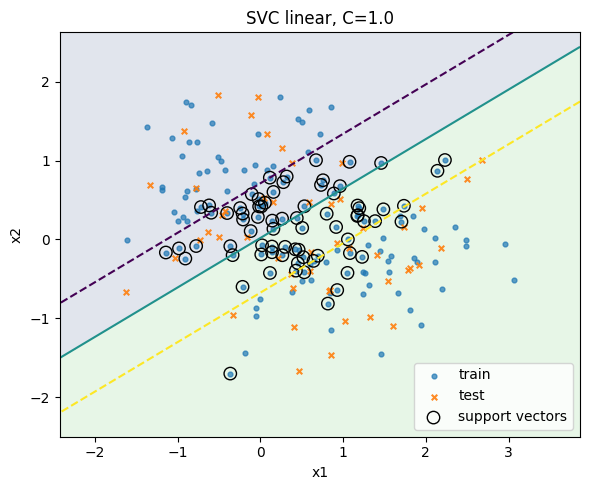

In [ ]:

clf_lin = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0, random_state=7))
clf_lin.fit(X_train, y_train)
plot_boundary(clf_lin, X_train, y_train, X_test, y_test, 'SVC linear, C=1.0')

## 2) RBF kernel (default gamma)

SVC rbf, C=1.0, gamma=scale
accuracy(train)=0.807 | accuracy(test)=0.940


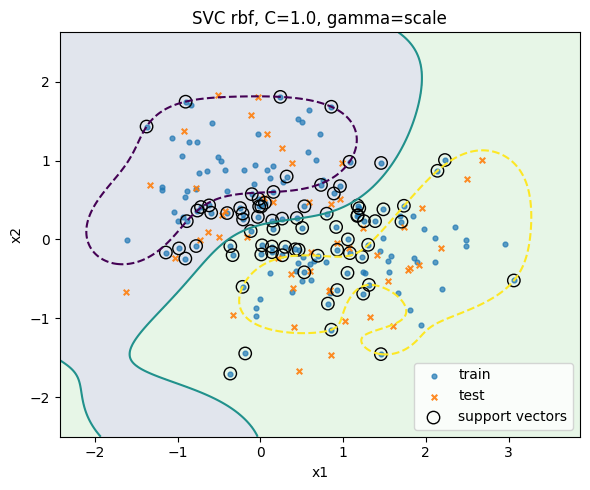

In [10]:

clf_rbf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale", random_state=7))
clf_rbf.fit(X_train, y_train)
plot_boundary(clf_rbf, X_train, y_train, X_test, y_test, 'SVC rbf, C=1.0, gamma=scale')


## 3) Poly kernel (degree=3)

SVC poly, degree=3, C=1.0
accuracy(train)=0.793 | accuracy(test)=0.860


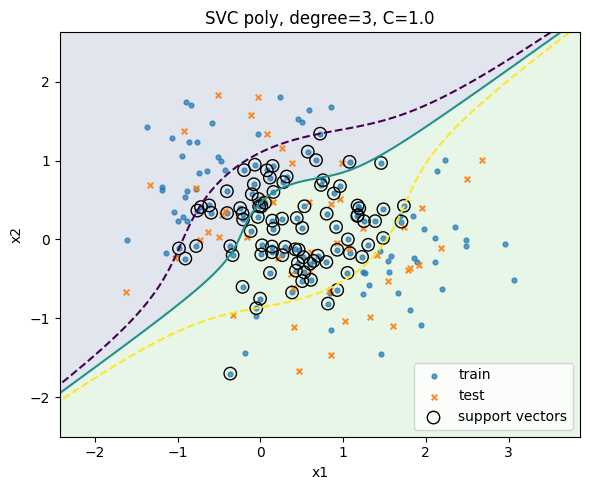

In [11]:

clf_poly3 = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, C=1.0, coef0=0.0, random_state=7))
clf_poly3.fit(X_train, y_train)
plot_boundary(clf_poly3, X_train, y_train, X_test, y_test, 'SVC poly, degree=3, C=1.0')


## 4) RBF gamma sweep

gamma=0.1
accuracy(train)=0.813 | accuracy(test)=0.880


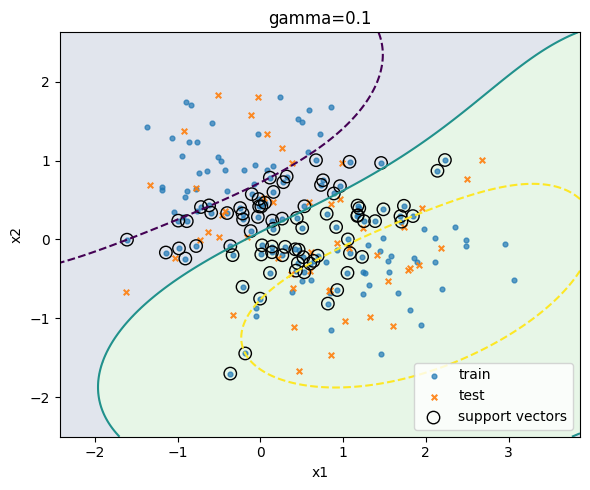

gamma=1
accuracy(train)=0.820 | accuracy(test)=0.940


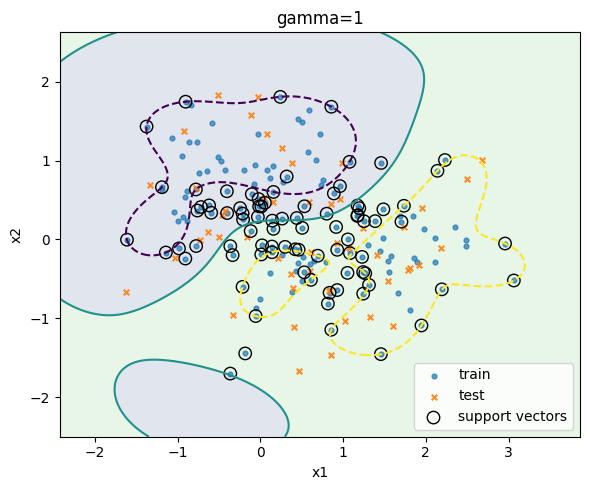

gamma=10
accuracy(train)=0.880 | accuracy(test)=0.840


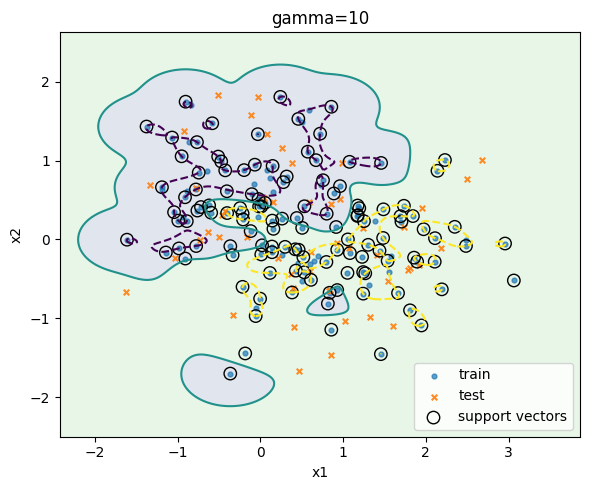

gamma=100
accuracy(train)=0.993 | accuracy(test)=0.640


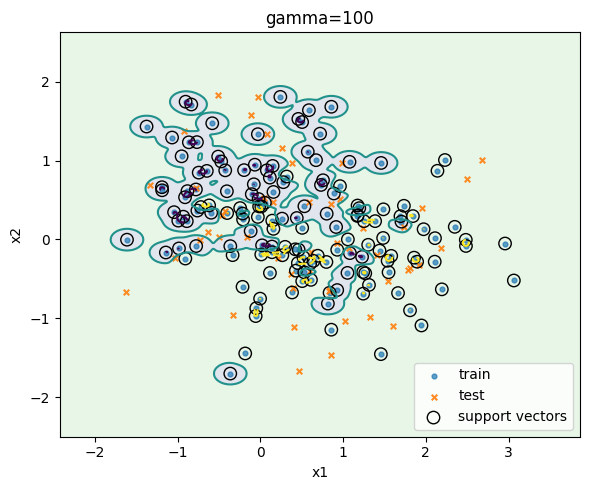

In [12]:

for g in [0.1, 1, 10, 100]:
    clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma=g, random_state=7))
    clf.fit(X_train, y_train)
    plot_boundary(clf, X_train, y_train, X_test, y_test, f"gamma={g}")


## 5) RBF C sweep

SVC rbf, C=0.1, gamma=scale
accuracy(train)=0.807 | accuracy(test)=0.900


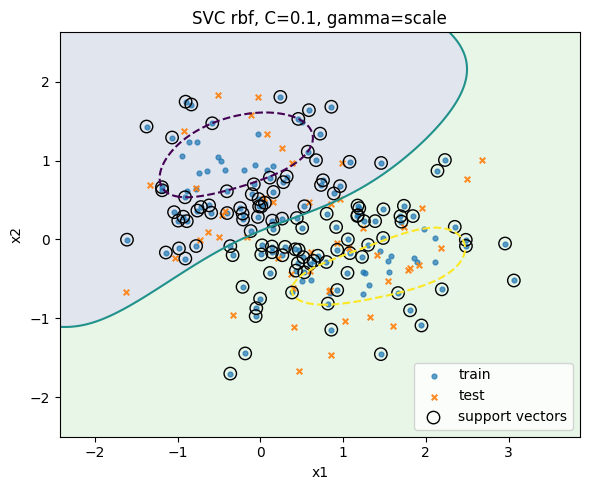

SVC rbf, C=1, gamma=scale
accuracy(train)=0.807 | accuracy(test)=0.940


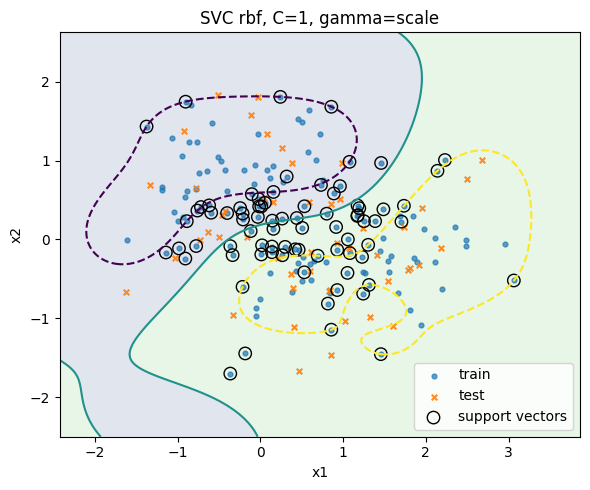

SVC rbf, C=10, gamma=scale
accuracy(train)=0.820 | accuracy(test)=0.940


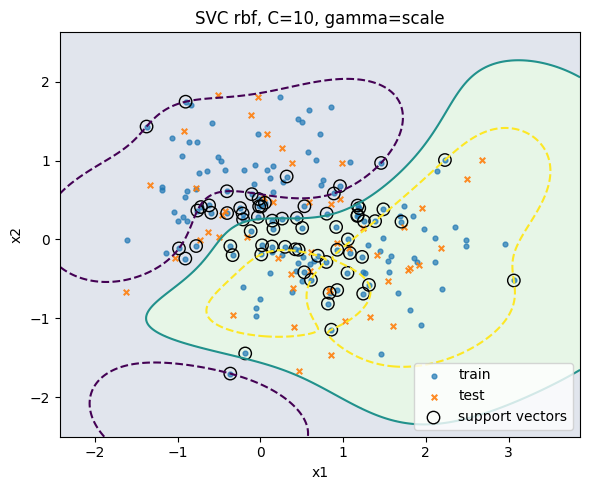

SVC rbf, C=100, gamma=scale
accuracy(train)=0.820 | accuracy(test)=0.920


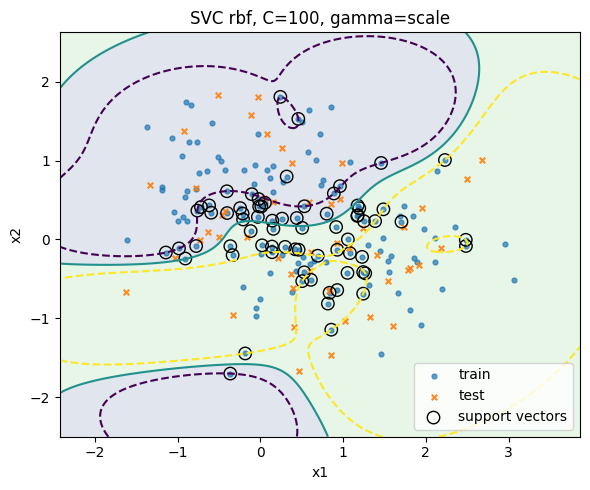

In [13]:

for c in [0.1, 1, 10, 100]:
    clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=c, gamma="scale", random_state=7))
    clf.fit(X_train, y_train)
    plot_boundary(clf, X_train, y_train, X_test, y_test, f"SVC rbf, C={c}, gamma=scale")


## 6) Polynomial degree sweep

SVC poly, degree=1, C=1.0
accuracy(train)=0.807 | accuracy(test)=0.880


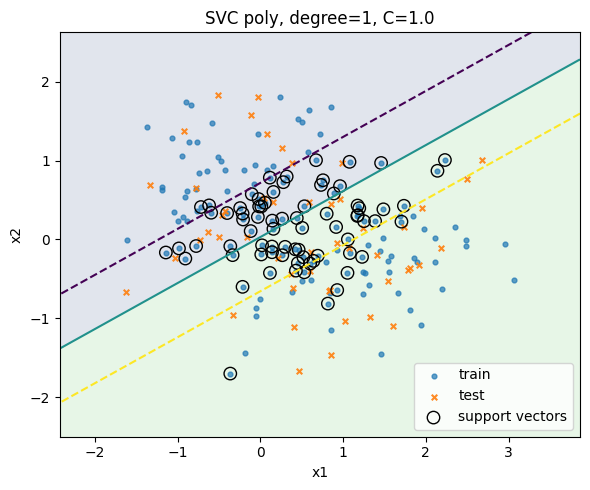

SVC poly, degree=2, C=1.0
accuracy(train)=0.547 | accuracy(test)=0.440


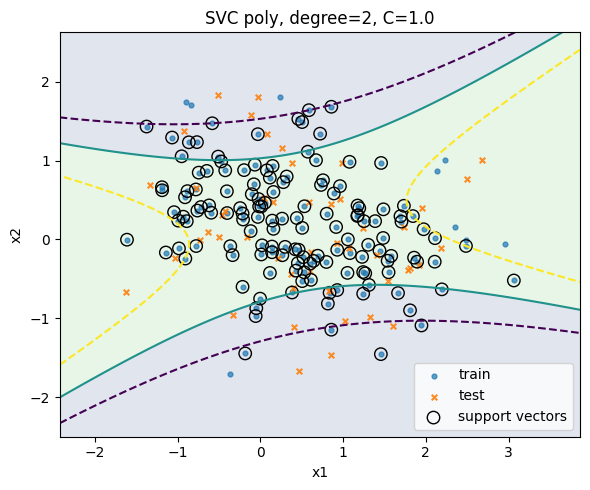

SVC poly, degree=3, C=1.0
accuracy(train)=0.793 | accuracy(test)=0.860


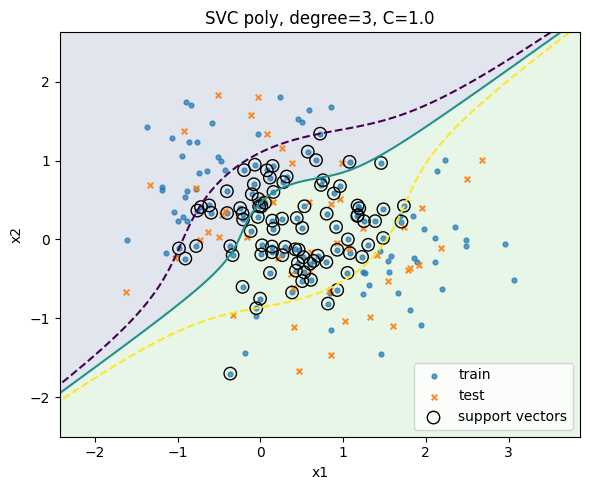

SVC poly, degree=4, C=1.0
accuracy(train)=0.527 | accuracy(test)=0.520


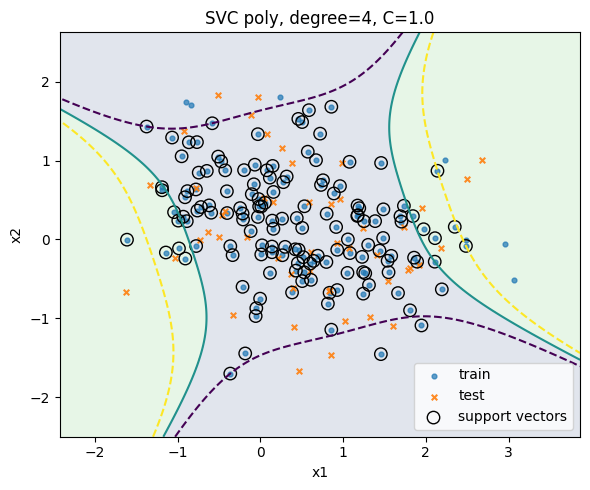

In [14]:

for deg in [1, 2, 3, 4]:
    clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=deg, C=1.0, coef0=0.0, random_state=7))
    clf.fit(X_train, y_train)
    plot_boundary(clf, X_train, y_train, X_test, y_test, f"SVC poly, degree={deg}, C=1.0")
